# 标签

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#legend()-函数" data-toc-modified-id="legend()-函数-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>legend() 函数</a></span></li><li><span><a href="#产生特殊形状的-marker-key" data-toc-modified-id="产生特殊形状的-marker-key-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>产生特殊形状的 marker key</a></span></li><li><span><a href="#指定-legend-的位置" data-toc-modified-id="指定-legend-的位置-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>指定 legend 的位置</a></span></li><li><span><a href="#同一个-Axes-中的多个-legend¶" data-toc-modified-id="同一个-Axes-中的多个-legend¶-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>同一个 Axes 中的多个 legend¶</a></span></li><li><span><a href="#loc参数" data-toc-modified-id="loc参数-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>loc参数</a></span></li><li><span><a href="#更多用法" data-toc-modified-id="更多用法-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>更多用法</a></span></li><li><span><a href="#自定义-handle" data-toc-modified-id="自定义-handle-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>自定义 handle</a></span></li></ul></div>

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as mpl

%matplotlib inline

## legend() 函数
被用来添加图像的标签，其主要相关的属性有：

* `legend entry` - 一个 legend 包含一个或多个 entry，一个 entry 对应一个 key 和一个 label
* `legend key` - marker 的标记
* `legend label` - key 的说明
* `legend handle `- 一个 entry 在图上对应的对象

调用 `legend() `会自动获取当前的 `Axes `对象，并且得到这些` handles `和 `labels`，相当于：
```
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
```

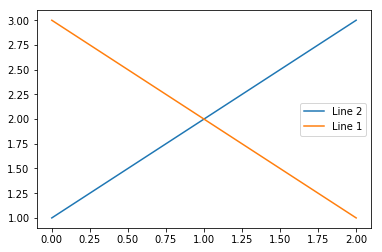

In [7]:
# 指定 handles 的参数
line_up, = plt.plot([1,2,3],label = 'Line 2')
line_down, = plt.plot([3,2,1],label = 'Line 1')
plt.legend(handles=[line_up,line_down])
plt.show()

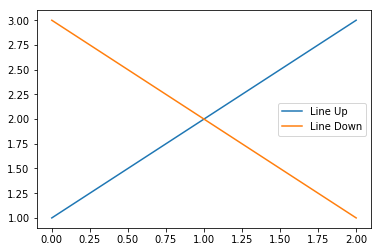

In [8]:
# 可以将 labels 作为参数输入 legend 函数：
line_up, = plt.plot([1,2,3])
line_down, = plt.plot([3,2,1])
plt.legend([line_up, line_down], ['Line Up', 'Line Down'])
plt.show()

## 产生特殊形状的 marker key

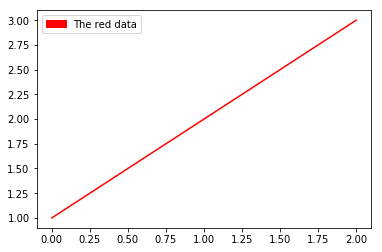

In [11]:
#有时我们可以产生一些特殊形状的 marker：
import matplotlib.patches as mpatches
plt.plot([1,2,3],'r')
red_patch = mpatches.Patch(color='red', label='The red data')
plt.legend(handles=[red_patch])

plt.show()

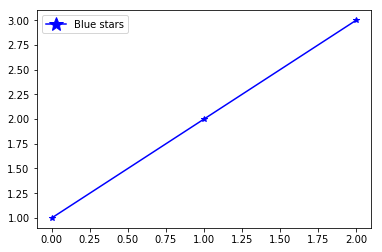

In [13]:
# 点线组合：
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
plt.plot([1,2,3],'b*',[1,2,3],'b')

blue_line = mlines.Line2D([], [], color='blue', marker='*',
                          markersize=15, label='Blue stars')
plt.legend(handles=[blue_line])

plt.show()

## 指定 legend 的位置

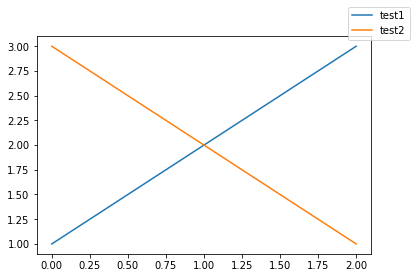

In [19]:
plt.plot([1,2,3], label="test1")
plt.plot([3,2,1], label="test2")
# a, = plt.plot([1,2,3], label="test1")
# b, = plt.plot([3,2,1], label="test2")
# plt.legend(handles = [a,b])

# bbox_to_anchor指定legend位置
plt.legend(bbox_to_anchor=(1, 1),
         bbox_transform=plt.gcf().transFigure)

plt.show()

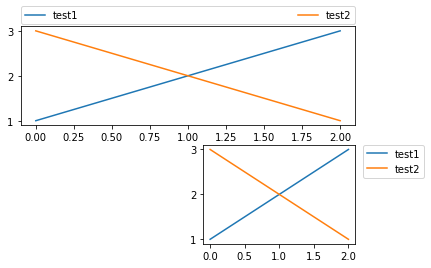

In [26]:
# 更复杂的用法：
plt.subplot(211)
plt.plot([1,2,3], label="test1")
plt.plot([3,2,1], label="test2")
# Place a legend above this legend, expanding itself to
# fully use the given bounding box.
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.subplot(224)
plt.plot([1,2,3], label="test1")
plt.plot([3,2,1], label="test2")
# Place a legend to the right of this smaller figure.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

## 同一个 Axes 中的多个 legend¶


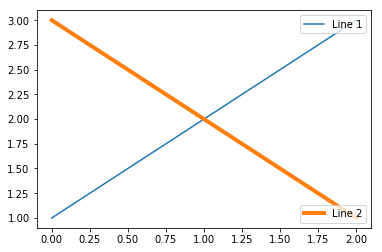

In [31]:
line1, = plt.plot([1,2,3], label="Line 1", linestyle='-')
line2, = plt.plot([3,2,1], label="Line 2", linewidth=4)

# Create a legend for the first line.
first_legend = plt.legend(handles=[line1], loc=1)

# 关键步骤
# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)

# Create another legend for the second line.
plt.legend(handles=[line2], loc=4)

plt.show()

## loc参数

其中 `loc `参数可以取` 0-10` 或者 字符串，表示放置的位置：

loc string|	loc code
------------:|:--------
`'best'`	|`0`
`'upper right'`|`	1`
`'upper left'`|`	2`
`'lower left'	`|`3`
`'lower right'`|`	4`
`'right'	`|`5`
`'center left'	`|`6`
`'center right'`|`	7`
`'lower center'`|`	8`
`'upper center'`|`	9`
`'center'`|`	10`

## 更多用法

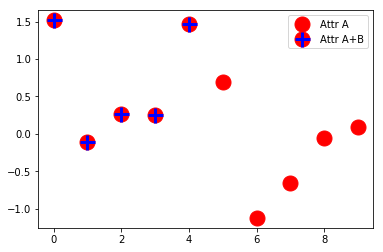

In [49]:
# 多个 handle 可以通过括号组合在一个 entry 中
from numpy.random import randn
# 返回一个标准正态分布样本
z = randn(10)

red_dot, = plt.plot(z, "ro", markersize=15)
# Put a white cross over some of the data.
blue_cross, = plt.plot(z[:5], "b+", markeredgewidth=3, markersize=15)

plt.legend([red_dot, (red_dot, blue_cross)], ["Attr A", "Attr A+B"])

plt.show()

## 自定义 handle

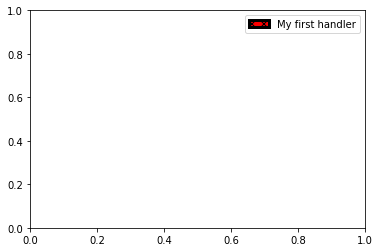

In [50]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

class AnyObject(object):
    pass

class AnyObjectHandler(object):
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        patch = mpatches.Rectangle([x0, y0], width, height, facecolor='r',
                                   edgecolor='black', hatch='xx', lw=3,
                                   transform=handlebox.get_transform())
        handlebox.add_artist(patch)
        return patch

plt.legend([AnyObject()], ['My first handler'],
           handler_map={AnyObject: AnyObjectHandler()})

plt.show()

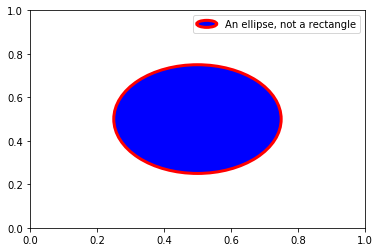

In [52]:
# 椭圆：
from matplotlib.legend_handler import HandlerPatch
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=width + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]


c = mpatches.Circle((0.5, 0.5), 0.25, facecolor="blue",
                    edgecolor="red", linewidth=3)
plt.gca().add_patch(c)

plt.legend([c], ["An ellipse, not a rectangle"],
           handler_map={mpatches.Circle: HandlerEllipse()})

plt.show()